In [10]:
import pandas as pd



In [11]:
# Load the dummy dataset
df = pd.read_csv("../data/processed/hotel_prices_dummy.csv")

# have a look
print(df.head())
print(df.info())
print(df.describe())


                                    hotel  rating   price        date
0  Doubletree By Hilton New York Downtown     3.5  283.71  2025-12-01
1  Doubletree By Hilton New York Downtown     3.5  193.18  2025-12-02
2  Doubletree By Hilton New York Downtown     3.5  176.84  2025-12-03
3  Doubletree By Hilton New York Downtown     3.5  293.57  2025-12-04
4  Doubletree By Hilton New York Downtown     3.5  277.82  2025-12-05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hotel   120 non-null    object 
 1   rating  120 non-null    float64
 2   price   120 non-null    float64
 3   date    120 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.9+ KB
None
           rating       price
count  120.000000  120.000000
mean     4.300000  210.673333
std      0.545416   59.363068
min      3.500000  100.400000
25%      3.950000  165.975000
50%      4.450000

In [12]:
df['date'] = pd.to_datetime(df['date'])



In [13]:
print(df['hotel'].nunique())


4


In [19]:
# Calculate average price per hotel
top_hotels = df.groupby('hotel')['price'].mean().sort_values(ascending=False).head(5).index

# Filter dataset
df_top = df[df['hotel'].isin(top_hotels)]



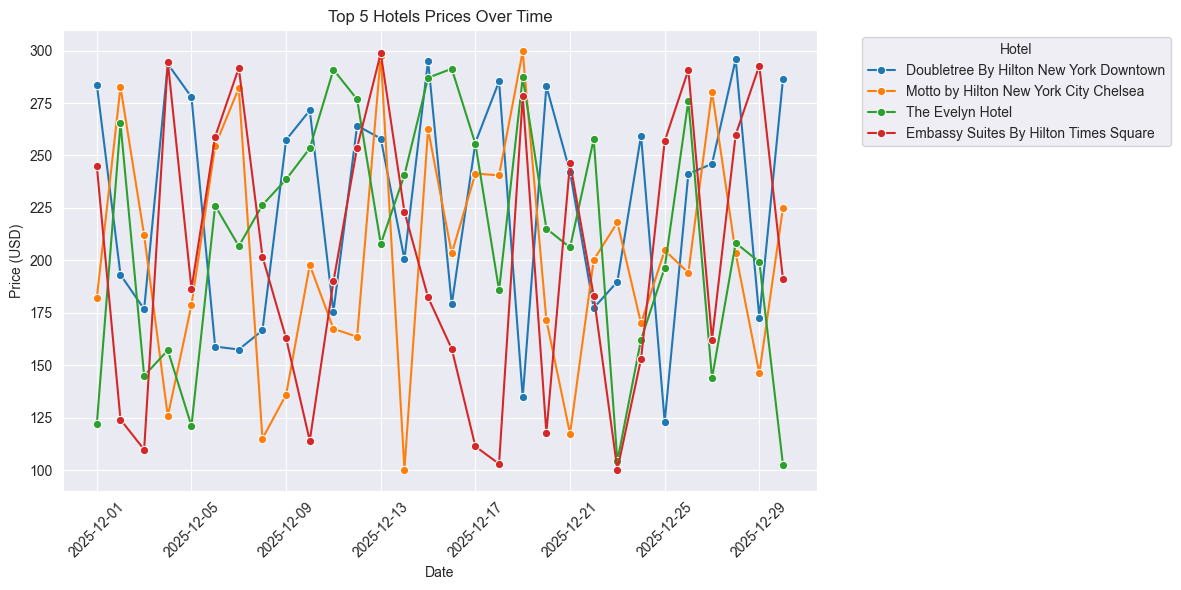

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_top, x='date', y='price', hue='hotel', marker="o")
plt.title("Top 5 Hotels Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.legend(title="Hotel", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


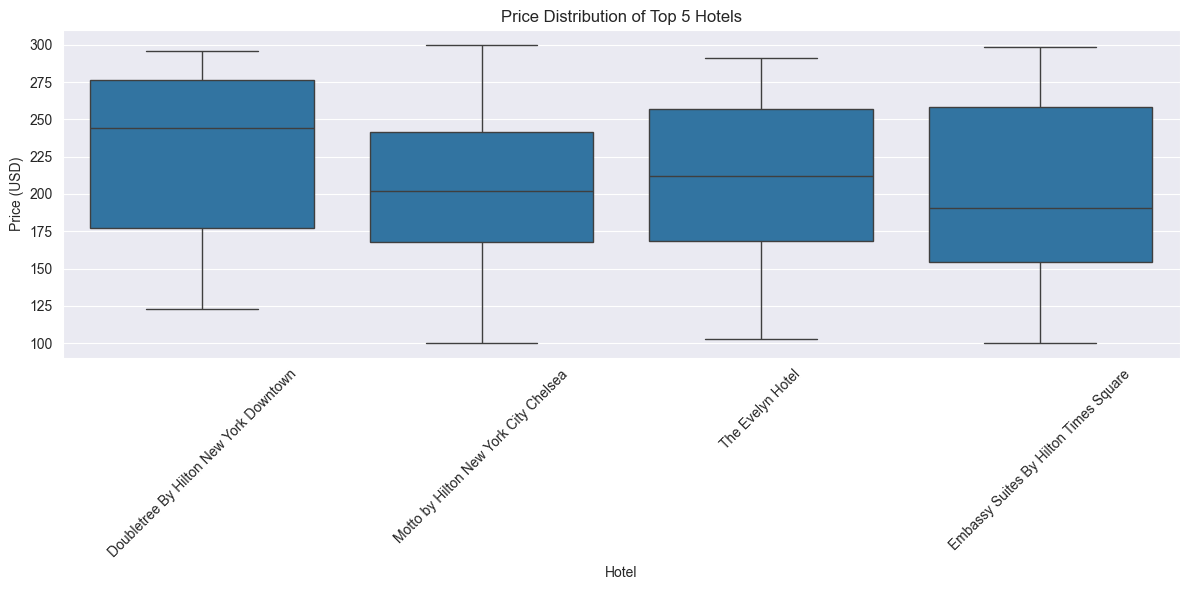

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='hotel', y='price', data=df_top)
plt.title("Price Distribution of Top 5 Hotels")
plt.xticks(rotation=45)
plt.ylabel("Price (USD)")
plt.xlabel("Hotel")
plt.tight_layout()
plt.show()


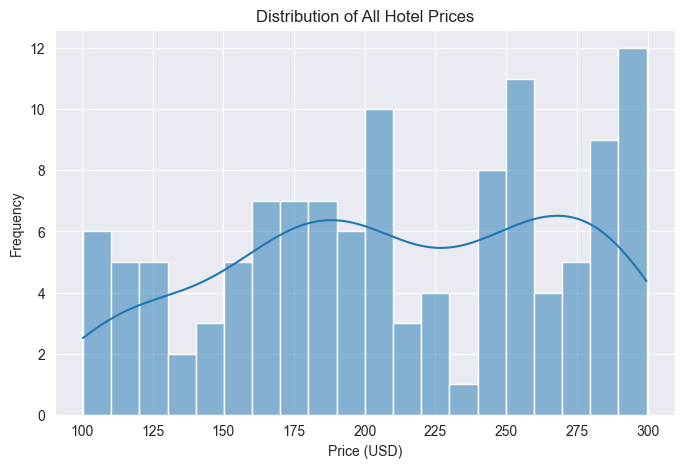

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Distribution of All Hotel Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


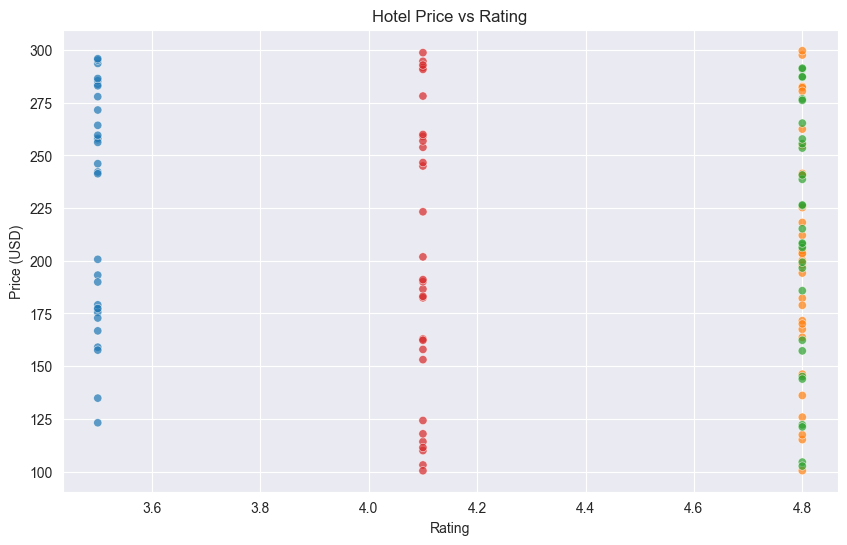

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='rating', y='price', hue='hotel', alpha=0.7)
plt.title("Hotel Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Price (USD)")
plt.legend([],[], frameon=False)  # remove legend if too many hotels
plt.show()
